In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df_dia = pd.read_csv('flo_dataset_non_imputed_scaled_diameter.csv')
df_abs = pd.read_csv('flo_dataset_non_imputed_scaled_abs.csv')
df_emi = pd.read_csv('flo_dataset_non_imputed_scaled_emission.csv')

In [3]:
input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 'x5_None', 'x5_trioctylphosphine',
       'x6_None', 'x6_acetic acid', 'x6_superhydride',
       'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide',
       'x6_zinc chloride', 'x6_zinc iodide', 'x6_zinc octanoate',
       'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 'x7_None',
       'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide']

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']


## 85/15

In [14]:
#Splitting dataset

X_d = df_dia[input_col]
X_e = df_emi[input_col]
X_a = df_abs[input_col]

Y_d = df_dia[diameter]
Y_e = df_emi[emission]
Y_a = df_abs[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_d, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X_e, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X_a, Y_a, test_size=0.15, random_state=45, shuffle=True)

## Diameter _ Using Extra Trees

In [7]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:14<00:00, 18.12s/it]

0.9136363636363637 2 17 15


## Absorption _ Using Extra Trees

In [8]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [09:17<00:00, 23.21s/it]

17.516129032258064 4 18 7


## Emission _ Using Extra Trees

In [9]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:51<00:00, 22.14s/it]

16.846153846153847 1 3 38


In [15]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=17,
                                            random_state=15)
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=3,     
                            random_state=38).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=4, 
                                            max_features=18,
                                            random_state=7).fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.267279               0.913636               1.56248                    1.24999
Absorption  0.723446              17.5161               776.766                     27.8705
Emission    0.808044              16.8462               535.769                     23.1467


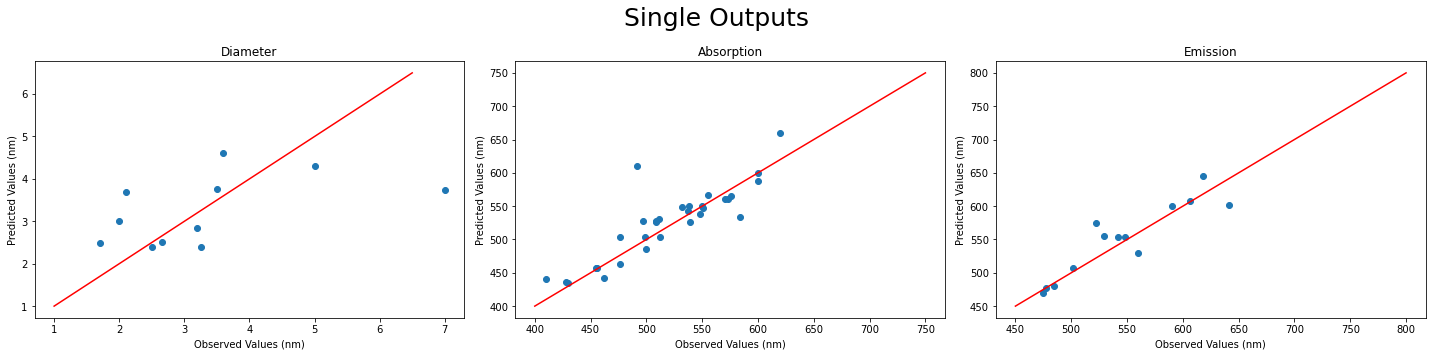

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## 35/65

In [17]:
#Splitting dataset

X_d = df_dia[input_col]
X_e = df_emi[input_col]
X_a = df_abs[input_col]

Y_d = df_dia[diameter]
Y_e = df_emi[emission]
Y_a = df_abs[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_d, Y_d, test_size=0.35, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X_e, Y_e, test_size=0.35, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X_a, Y_a, test_size=0.35, random_state=45, shuffle=True)

## Diameter Extra Trees

In [11]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:25<00:00, 18.58s/it]

0.8175 2 10 31


## Abs Extra Trees

In [12]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:08<00:00, 20.34s/it]

24.26388888888889 2 23 47


## Emission Extra Trees

In [13]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:26<00:00, 18.59s/it]

22.983333333333334 2 3 46


In [18]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=10,
                                            random_state=31)
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=2,
                            max_features=3,     
                            random_state=46).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=47).fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.14649                  0.8175               1.65401                    1.28608
Absorption  0.693506                24.2639            1013.31                      31.8325
Emission    0.784875                22.9833             786.192                     28.0391


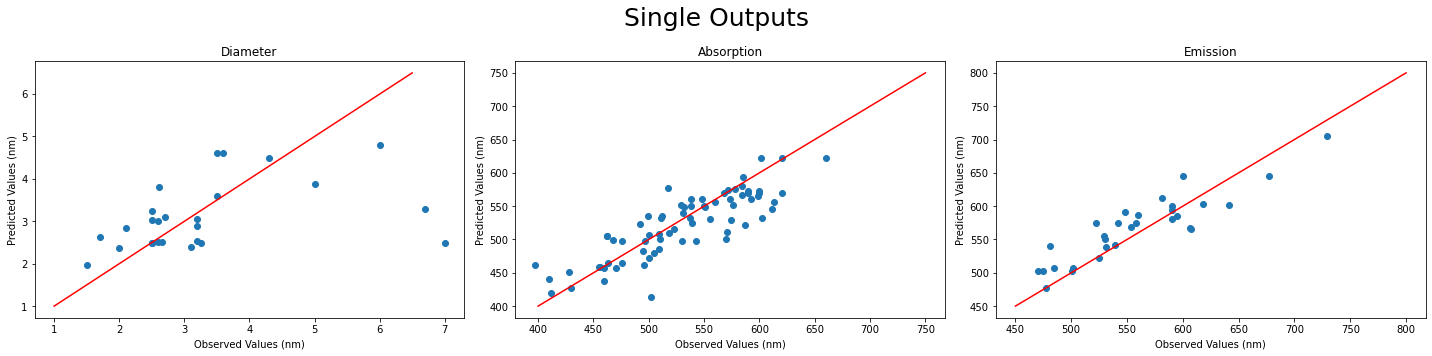

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()